In [1]:
# === Import Library ===
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt


In [2]:
file_path = r'C:/Users/sugih/Downloads/Sugiyanto_4123042_NaivaBayes_Logistikregression1/Review1CSV.csv'
with open(file_path, encoding='utf-8') as f:
    raw_lines = f.readlines()

parsed_rows = []
for line in raw_lines:
    reader = csv.reader([line.strip()])
    parsed = next(reader)
    if len(parsed) == 5 and parsed[0].isdigit():
        parsed_rows.append(parsed)

df_cleaned = pd.DataFrame(parsed_rows, columns=["No", "Review", "Label", "Tanggal", "Rating"])
df_cleaned["Rating"] = df_cleaned["Rating"].astype(int)


In [3]:
label_encoder = LabelEncoder()
df_cleaned["LabelEncoded"] = label_encoder.fit_transform(df_cleaned["Label"])

tfidf = TfidfVectorizer(stop_words=None)
X = tfidf.fit_transform(df_cleaned["Review"])
y = df_cleaned["LabelEncoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


✅ Akurasi   : 0.89
✅ Precision : 0.91
✅ Recall    : 0.89
✅ F1-Score  : 0.89

📋 Classification Report:
               precision    recall  f1-score   support

     Negatif       0.76      1.00      0.86        35
      Netral       1.00      0.84      0.91        31
     Positif       1.00      0.81      0.89        31

    accuracy                           0.89        97
   macro avg       0.92      0.88      0.89        97
weighted avg       0.91      0.89      0.89        97



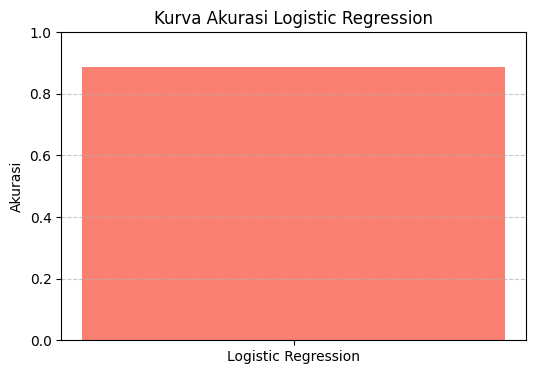

In [4]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Akurasi   : {acc:.2f}")
print(f"✅ Precision : {prec:.2f}")
print(f"✅ Recall    : {rec:.2f}")
print(f"✅ F1-Score  : {f1:.2f}")

# Jika Anda ingin lihat rincian per kelas:
from sklearn.metrics import classification_report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi kurva akurasi
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(["Logistic Regression"], [acc], color='salmon')
plt.title("Kurva Akurasi Logistic Regression")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


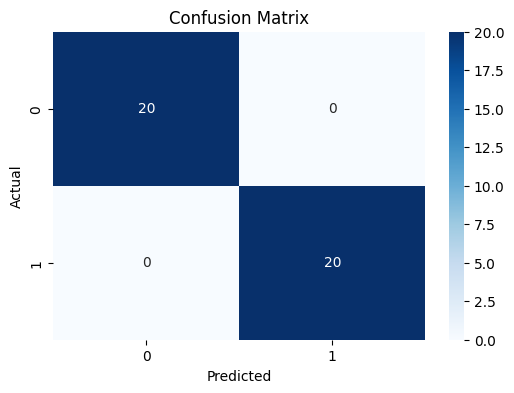

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [13]:
# ✅ Pastikan ini benar: split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
# ✅ Latih ulang model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Prediksi hanya pada data uji
y_pred = model.predict(X_test)
# ✅ Hitung confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# ✅ Visualisasi heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# ✅ Laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


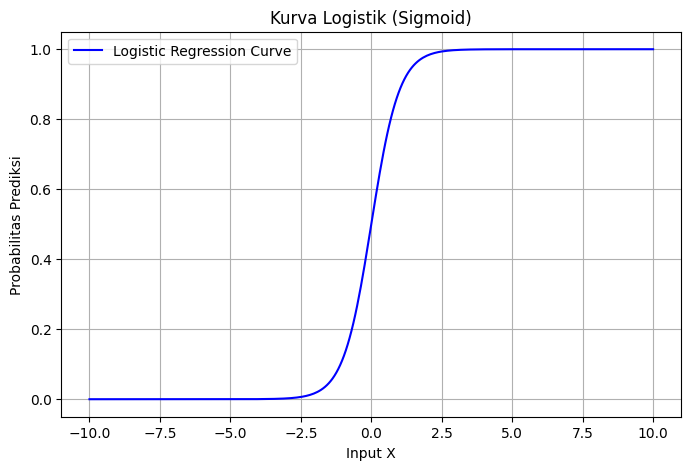

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Contoh data: satu fitur saja
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # 100 titik dari -10 ke 10
y = (X > 0).astype(int).ravel()  # Label 0 jika x<0, label 1 jika x>=0
# Model Logistic Regression
model = LogisticRegression()
model.fit(X, y)
# Prediksi probabilitas
X_test = np.linspace(-10, 10, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]  # ambil probabilitas kelas 1
# Plot kurva logistik
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_prob, color='blue', label='Logistic Regression Curve')
plt.title("Kurva Logistik (Sigmoid)")
plt.xlabel("Input X")
plt.ylabel("Probabilitas Prediksi")
plt.grid(True)
plt.legend()
plt.show()